In [7]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

UsageError: Line magic function `%` not found.


In [40]:
# read in the json files
portfolio = pd.read_json('../input/portfolio.json', orient='records', lines=True)
profile = pd.read_json('../input/profile.json', orient='records', lines=True)
transcript = pd.read_json('../input/transcript.json', orient='records', lines=True)

In [6]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [7]:
portfolio = portfolio.rename(columns={'id': 'offer_id', 
                                      'difficulty': 'required_spend',
                                     })

In [8]:
dummies = pd.get_dummies(portfolio['channels'].apply(pd.Series).stack(), prefix='channel').sum(level=0)
portfolio = portfolio.merge(dummies, left_index=True, right_index=True)
portfolio = portfolio.drop('channels', axis=1)

In [9]:
portfolio['offer_name'] = portfolio['offer_type'] + '-' + portfolio['required_spend'].astype(str) + 'spend-' + + portfolio['reward'].astype(str) + 'reward-' + portfolio['duration'].astype(str) + 'days' 

In [10]:
portfolio

,reward,required_spend,duration,offer_type,offer_id,channel_email,channel_mobile,channel_social,channel_web,offer_name
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,bogo-10spend-10reward-7days
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,bogo-10spend-10reward-5days
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1,informational-0spend-0reward-4days
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1,bogo-5spend-5reward-7days
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1,discount-20spend-5reward-10days
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,discount-7spend-3reward-7days
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,discount-10spend-2reward-10days
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0,informational-0spend-0reward-3days
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,bogo-5spend-5reward-5days
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1,discount-10spend-2reward-7days


In [11]:
portfolio.duplicated().sum()

0

In [41]:
profile.head(5)

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [42]:
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')
profile['became_member_year'] = pd.DatetimeIndex(profile['became_member_on']).year
profile['became_member_month'] = pd.DatetimeIndex(profile['became_member_on']).month

In [43]:
profile['membership_duration'] = (profile['became_member_on'].max() - profile['became_member_on'])

In [44]:
profile.head(5)

,gender,age,id,became_member_on,income,became_member_year,became_member_month,membership_duration
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,2017,2,529 days
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,376 days
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,2018,7,14 days
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,5,443 days
4,None,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,2017,8,356 days


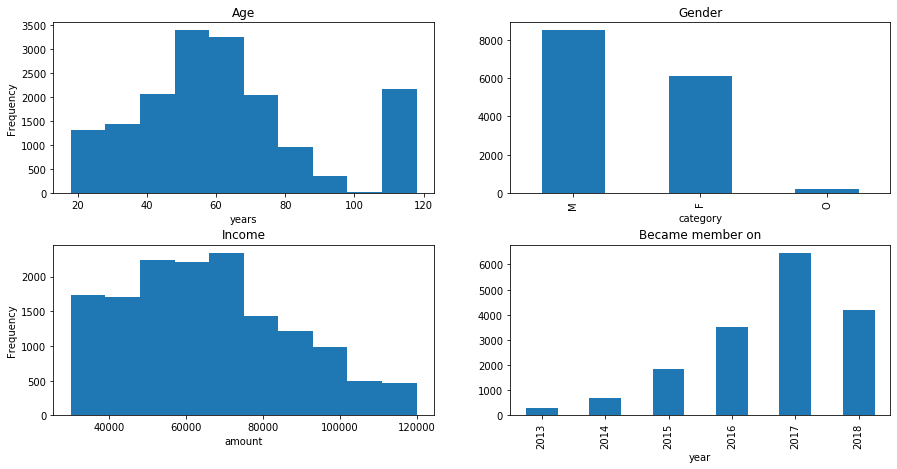

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(15,7))

profile['age'].plot(kind='hist', ax=axes[0, 0], title='Age').set_xlabel('years')
profile['gender'].value_counts().plot(kind='bar', ax=axes[0, 1], title='Gender').set_xlabel('category')
profile['income'].plot(kind='hist', ax=axes[1, 0], title='Income').set_xlabel('amount')
profile['became_member_year'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 1], title='Became member on').set_xlabel('year')

plt.subplots_adjust(hspace = 0.3, bottom=0.1)
plt.show()

In [45]:
profile['age'] = profile['age'].replace(118, np.nan)

In [46]:
# Dropping O to maintain the balance in the dataset for further prediction
profile['gender'] = profile[profile['gender'] !='O']

In [47]:
profile['gender'].value_counts()

M    8484
F    6129
Name: gender, dtype: int64

In [48]:
profile['gender'] = profile['gender'].map({'M': 0, 'F': 1})

In [49]:
profile['gender'].value_counts()

0.0    8484
1.0    6129
Name: gender, dtype: int64

In [50]:
profile.duplicated().sum()

0

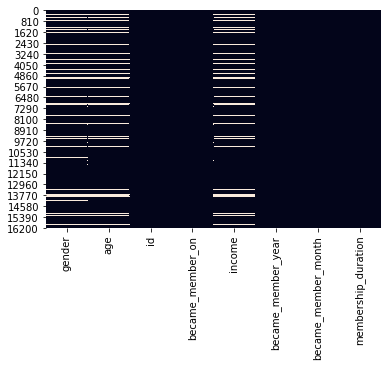

In [51]:
sns.heatmap(profile.isnull(), cbar=False)

In [52]:
profile = profile.drop(profile[profile['gender'].isnull()].index)

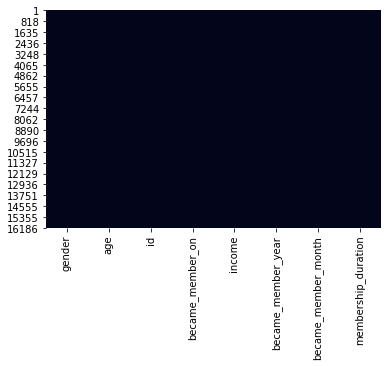

In [53]:
sns.heatmap(profile.isnull(), cbar=False)

In [54]:
profile.shape

(14613, 8)

In [55]:
# grouping ages into groups to combine them into categories
# binning of age -> transform into descrete groups
bins = [10, 20, 30, 40, 50, 60, 70, 80, 120]
group_names = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
profile['age_categories'] = pd.cut(profile['age'], bins, labels=group_names)

In [56]:
bins = [20000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000]
labels = ['20k-39k', '40k-49k', '50k-59k', '60k-69k', '70k-79k', '80k-89k', '90k-99k', '100k-109k', '110k-120k']
profile['income_binned'] = pd.cut(profile['income'], bins=bins, labels=labels)

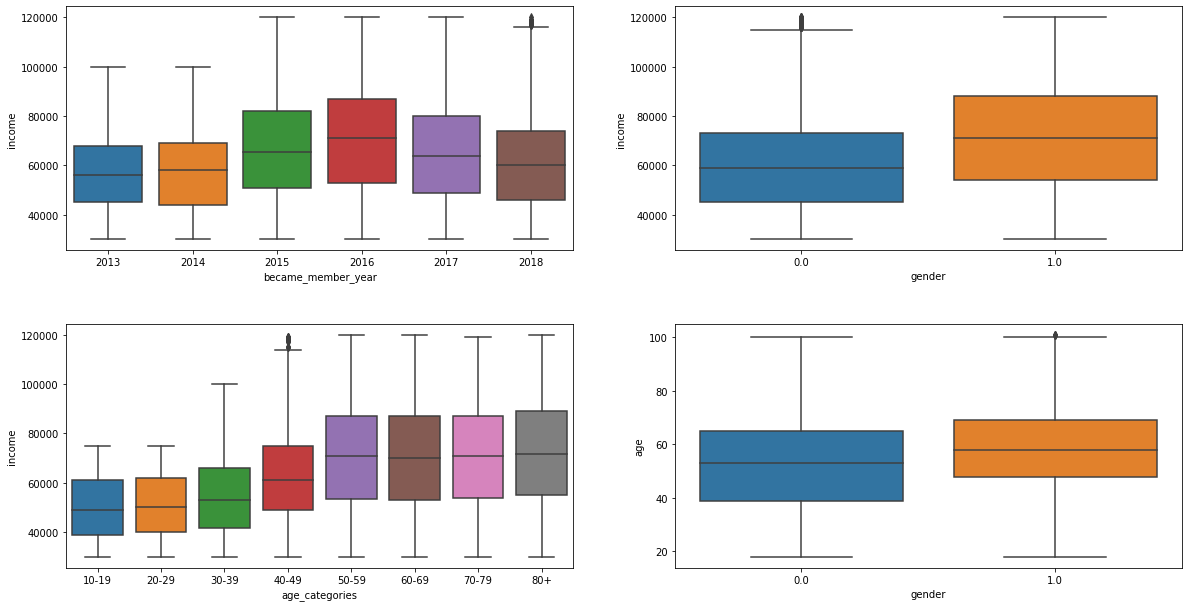

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.boxplot(data=profile, x='became_member_year', y='income', ax=axes[0, 0])
sns.boxplot(data=profile, x='gender', y='income', ax=axes[0, 1])
sns.boxplot(data=profile, x='age_categories', y='income', ax=axes[1, 0])
sns.boxplot(data=profile, x='gender', y='age', ax=axes[1, 1])
plt.subplots_adjust(hspace = 0.3, bottom=0.1)

In [58]:
profile = profile.rename(columns={'id': 'customer_id'})

In [29]:
transcript.head(5)

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [30]:
# getting the values out of a dict object
# combining both offer id and offer_id into a single column
values_df = pd.DataFrame(transcript['value'].tolist())
values_df['offerid'] = values_df['offer id'].combine_first(values_df['offer_id'])
values_df.drop(['offer id', 'offer_id'], axis=1, inplace=True)
index_df = pd.DataFrame({'idx': transcript.index.values.tolist()})
combined = index_df.merge(values_df, left_index=True, right_index=True)
combined_index = combined.set_index('idx')
transcript = transcript.merge(combined_index, left_index=True, right_index=True)

In [30]:
transcript.head(5)

,person,event,value,time,amount,reward,offerid
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,NaN,NaN,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,NaN,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0


In [31]:
transcript = transcript.merge(portfolio, left_on='offerid', right_on='offer_id', how='left')

In [32]:
transcript = transcript.rename(columns={'reward_x': 'paid_reward', 
                                        'reward_y': 'planned_reward', 
                                       })

In [33]:
transcript = transcript.rename(columns={'person': 'customer_id'})

In [34]:
transcript['time'] = transcript['time'] / 24

In [35]:
transcript = transcript.drop(columns=['value'])

In [36]:
print(transcript.duplicated().sum())

397


In [37]:
transcript = transcript.drop_duplicates().reset_index(drop=True)

In [38]:
transcript['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33182
Name: event, dtype: int64

In [39]:
transaction_df = transcript[transcript['event'] == 'transaction'].copy()
transaction_df = transaction_df[['customer_id', 'time', 'amount']]
transaction_df.head(5)

,customer_id,time,amount
12654,02c083884c7d45b39cc68e1314fec56c,0.0,0.83
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0.0,34.56
12659,54890f68699049c2a04d415abc25e717,0.0,13.23
12670,b2f1cd155b864803ad8334cdf13c4bd2,0.0,19.51
12671,fe97aa22dd3e48c8b143116a8403dd52,0.0,18.97


In [40]:
offer_df = transcript[transcript['event'] != 'transaction'].copy()
offer_df = pd.get_dummies(offer_df, columns=['event'], prefix=None)
offer_df = offer_df.drop(columns=['amount', 'offerid', 'paid_reward'], axis=1)

In [41]:
offer_df = offer_df.rename(columns={'event_offer completed': 'event_offer_completed',
                                   'event_offer received': 'event_offer_received',
                                    'event_offer viewed': 'event_offer_viewed'
                                   })

In [42]:
offer_df.head(5)

,customer_id,time,planned_reward,required_spend,duration,offer_type,offer_id,channel_email,channel_mobile,channel_social,channel_web,offer_name,event_offer_completed,event_offer_received,event_offer_viewed
0,78afa995795e4d85b5d9ceeca43f5fef,0.0,5.0,5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,1.0,0.0,1.0,bogo-5spend-5reward-7days,0,1,0
1,a03223e636434f42ac4c3df47e8bac43,0.0,5.0,20.0,10.0,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1.0,0.0,0.0,1.0,discount-20spend-5reward-10days,0,1,0
2,e2127556f4f64592b11af22de27a7932,0.0,2.0,10.0,7.0,discount,2906b810c7d4411798c6938adc9daaa5,1.0,1.0,0.0,1.0,discount-10spend-2reward-7days,0,1,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0.0,2.0,10.0,10.0,discount,fafdcd668e3743c1bb461111dcafc2a4,1.0,1.0,1.0,1.0,discount-10spend-2reward-10days,0,1,0
4,68617ca6246f4fbc85e91a2a49552598,0.0,10.0,10.0,5.0,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1.0,1.0,1.0,1.0,bogo-10spend-10reward-5days,0,1,0


In [43]:
count_events = transcript['event'].value_counts()
total_events = count_events.sum()
percentage_transactions = count_events[0] / total_events * 100
percentage_offers = count_events[1:].sum() / total_events * 100

percentage_transactions, percentage_offers, count_events

(45.38915583545929, 54.610844164540715, transaction        138953
 offer received      76277
 offer viewed        57725
 offer completed     33182
 Name: event, dtype: int64)

In [44]:
print(portfolio.columns.to_list())
portfolio.head(1)

['reward', 'required_spend', 'duration', 'offer_type', 'offer_id', 'channel_email', 'channel_mobile', 'channel_social', 'channel_web', 'offer_name']


,reward,required_spend,duration,offer_type,offer_id,channel_email,channel_mobile,channel_social,channel_web,offer_name
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,bogo-10spend-10reward-7days


In [45]:
print(transaction_df.columns.to_list())
transaction_df.head(1)

['customer_id', 'time', 'amount']


,customer_id,time,amount
12654,02c083884c7d45b39cc68e1314fec56c,0.0,0.83


In [46]:
print(offer_df.columns.to_list())
offer_df.head(1)

['customer_id', 'time', 'planned_reward', 'required_spend', 'duration', 'offer_type', 'offer_id', 'channel_email', 'channel_mobile', 'channel_social', 'channel_web', 'offer_name', 'event_offer_completed', 'event_offer_received', 'event_offer_viewed']


,customer_id,time,planned_reward,required_spend,duration,offer_type,offer_id,channel_email,channel_mobile,channel_social,channel_web,offer_name,event_offer_completed,event_offer_received,event_offer_viewed
0,78afa995795e4d85b5d9ceeca43f5fef,0.0,5.0,5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,1.0,0.0,1.0,bogo-5spend-5reward-7days,0,1,0


In [96]:
print(profile.columns.to_list())
profile.head(1)

['gender', 'age', 'customer_id', 'became_member_on', 'income', 'became_member_year', 'became_member_month', 'membership_duration', 'age_categories', 'income_binned']


,gender,age,customer_id,became_member_on,income,became_member_year,became_member_month,membership_duration,age_categories,income_binned
1,1.0,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,376 days,50-59,110k-120k


In [111]:
#get the list of customerIds from offer df
customer_ids = offer_df['customer_id'].unique()
print(customer_ids)

['78afa995795e4d85b5d9ceeca43f5fef' 'a03223e636434f42ac4c3df47e8bac43'
 'e2127556f4f64592b11af22de27a7932' ... 'd825b707198046e39baa4fdcfa11d621'
 'c207a8a8ef5c47ee970ca45f859e07eb' '9a3f45cf29ef428b932492c7a5d6ac52']


In [112]:
# adding offer end date to see if the offer completed is in range
offer_df['offer_ends'] = offer_df['time'] + offer_df['duration']

In [113]:
def filter_by_cid(df, cid):
    return df[df['customer_id'] == cid]

In [114]:
def get_received(df):
    return df[df['event_offer_received'] == 1]

def get_viewed(df):
    return df[df['event_offer_viewed'] == 1]

def get_completed(df):
    return df[df['event_offer_completed'] == 1]

In [367]:
# a03223e636434f42ac4c3df47e8bac43
# '78afa995795e4d85b5d9ceeca43f5fef'
cid_78_offers = filter_by_cid(offer_df, '78afa995795e4d85b5d9ceeca43f5fef')
cid_78_transactions = filter_by_cid(transaction_df, '78afa995795e4d85b5d9ceeca43f5fef')

In [368]:
received_offers = get_received(cid_78_offers)
viewed_offers = get_viewed(cid_78_offers)
completed_offers = get_completed(cid_78_offers)
completed_offers

,customer_id,time,planned_reward,required_spend,duration,offer_type,offer_id,channel_email,channel_mobile,channel_social,channel_web,offer_name,event_offer_completed,event_offer_received,event_offer_viewed,offer_ends
47583,78afa995795e4d85b5d9ceeca43f5fef,5.50,5.0,5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,1.0,0.0,1.0,bogo-5spend-5reward-7days,1,0,0,12.50
218231,78afa995795e4d85b5d9ceeca43f5fef,21.25,10.0,10.0,7.0,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1.0,1.0,1.0,0.0,bogo-10spend-10reward-7days,1,0,0,28.25
218232,78afa995795e4d85b5d9ceeca43f5fef,21.25,5.0,5.0,5.0,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1.0,1.0,1.0,1.0,bogo-5spend-5reward-5days,1,0,0,26.25


In [377]:
def completed_lookup(row, completed_offers):
    row_len = row.shape[0]
    if row_len > 0:
        offers = completed_offers.loc[completed_offers['offer_id'] == row['offer_id'], :]
        time = offers.loc[offers['time'] >= row['time'], 'time']
        val = time.values
        if len(val) == 0:
            return -1
        else:
            return val[0]

In [376]:
def viewed_lookup(idx, row, viewed_offers):
    row_len = row.shape[0]
    if row_len > 0:
        offers = viewed_offers.loc[viewed_offers['offer_id'] == row['offer_id'], :]
        time = offers.loc[offers['time'] >= row['time'], 'time']
        val = time.values
        if len(val) == 0:
            return -1
        else:
            return val[0]

In [375]:
def transaction_lookup(row, transactions_df):
    start = row['time']
    end = row['offer_ends']
    cid = row['customer_id']
    condition = (transactions_df['customer_id'] == cid)
    time = transactions_df.loc[condition, 'time'].between(start, end)
    amount = transactions_df.loc[time, 'amount'].sum()
    return amount

In [378]:
def calc_offers(cid):
    offers = filter_by_cid(offer_df, cid)
    transactions = filter_by_cid(transaction_df, cid)
    received_offers = get_received(offers)
    viewed_offers = get_viewed(offers)
    completed_offers = get_completed(offers)
    transactions = filter_by_cid(transaction_df, cid)
    received_offers.loc[:, 'completed_at'] = received_offers.apply(lambda row: completed_lookup(row, completed_offers), axis=1)
    received_offers.loc[:, 'viewed_at'] = received_offers.apply(lambda row: viewed_lookup(row.name, row, viewed_offers), axis=1)
    received_offers.loc[:, 'offer_success'] = (received_offers['offer_ends'] > received_offers['completed_at']) & (received_offers['viewed_at'] <= received_offers['completed_at']) & (received_offers['completed_at'] != -1) & (received_offers['viewed_at'] != -1)
    received_offers.loc[:, 'offer_success_no_view'] = (received_offers['completed_at'] > 0) & ((received_offers['viewed_at'] == -1) | (received_offers['viewed_at'] > received_offers['completed_at']))
    received_offers.loc[:, 'amount'] = received_offers.apply(lambda row: transaction_lookup(row, transactions), axis=1)
    received_offers.loc[:, 'offer_success'] = received_offers['offer_success'].map({True: 1, False: 0})
    received_offers.loc[:, 'offer_success_no_view'] = received_offers['offer_success_no_view'].map({True: 1, False: 0})
    return received_offers

In [379]:
vfunc = np.vectorize(calc_offers)
calculated_offer_df = pd.concat(vfunc(customer_ids))

In [384]:
calculated_offer_df.head(5)

,customer_id,time,planned_reward,required_spend,duration,offer_type,offer_id,channel_email,channel_mobile,channel_social,...,offer_name,event_offer_completed,event_offer_received,event_offer_viewed,offer_ends,completed_at,viewed_at,offer_success,offer_success_no_view,amount
0,78afa995795e4d85b5d9ceeca43f5fef,0.0,5.0,5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,1.0,0.0,...,bogo-5spend-5reward-7days,0,1,0,7.0,5.50,0.25,1,0,37.67
53176,78afa995795e4d85b5d9ceeca43f5fef,7.0,0.0,0.0,3.0,informational,5a8bc65990b245e5a138643cd4eb9837,1.0,1.0,1.0,...,informational-0spend-0reward-3days,0,1,0,10.0,-1.00,9.00,0,0,49.39
150575,78afa995795e4d85b5d9ceeca43f5fef,17.0,10.0,10.0,7.0,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1.0,1.0,1.0,...,bogo-10spend-10reward-7days,0,1,0,24.0,21.25,17.00,1,0,48.28
201427,78afa995795e4d85b5d9ceeca43f5fef,21.0,5.0,5.0,5.0,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1.0,1.0,1.0,...,bogo-5spend-5reward-5days,0,1,0,26.0,21.25,24.25,0,1,48.28
1,a03223e636434f42ac4c3df47e8bac43,0.0,5.0,20.0,10.0,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1.0,0.0,0.0,...,discount-20spend-5reward-10days,0,1,0,10.0,-1.00,0.25,0,0,1.09


In [392]:
calculated_offer_df.shape

(76277, 21)

In [394]:
offer_df[offer_df['event_offer_received'] == 1].shape

(76277, 16)

In [59]:
profile.head(5)

,gender,age,customer_id,became_member_on,income,became_member_year,became_member_month,membership_duration,age_categories,income_binned
1,1.0,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,376 days,50-59,110k-120k
3,1.0,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,5,443 days,70-79,90k-99k
5,0.0,68.0,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,2018,4,91 days,60-69,60k-69k
8,0.0,65.0,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,2018,2,167 days,60-69,50k-59k
12,0.0,58.0,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,2017,11,257 days,50-59,50k-59k


In [8]:
#calculated_offer_df.to_csv('../input/offers.csv', index=False)
#profile.to_csv('../input/profile.csv', index=False)
#portfolio.to_csv('../input/portfolio.csv', index=False)

In [27]:
offers = pd.read_csv('../input/offers.csv')
profile = pd.read_csv('../input/profile.csv')
portfolio = pd.read_csv('../input/portfolio.csv')

In [28]:
offers.shape

(76277, 21)

In [29]:
offers.columns

Index(['customer_id', 'time', 'planned_reward', 'required_spend', 'duration',
       'offer_type', 'offer_id', 'channel_email', 'channel_mobile',
       'channel_social', 'channel_web', 'offer_name', 'event_offer_completed',
       'event_offer_received', 'event_offer_viewed', 'offer_ends',
       'completed_at', 'viewed_at', 'offer_success', 'offer_success_no_view',
       'amount'],
      dtype='object')

In [30]:
profile.head(5)

,gender,age,customer_id,became_member_on,income,became_member_year,became_member_month,membership_duration,age_categories,income_binned
0,1.0,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,376 days 00:00:00.000000000,50-59,110k-120k
1,1.0,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,5,443 days 00:00:00.000000000,70-79,90k-99k
2,0.0,68.0,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,2018,4,91 days 00:00:00.000000000,60-69,60k-69k
3,0.0,65.0,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,2018,2,167 days 00:00:00.000000000,60-69,50k-59k
4,0.0,58.0,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,2017,11,257 days 00:00:00.000000000,50-59,50k-59k


In [31]:
offers = offers.merge(profile, left_on='customer_id', right_on='customer_id', how='inner')

In [32]:
offers.shape

(65585, 30)

In [33]:
offers.columns

Index(['customer_id', 'time', 'planned_reward', 'required_spend', 'duration',
       'offer_type', 'offer_id', 'channel_email', 'channel_mobile',
       'channel_social', 'channel_web', 'offer_name', 'event_offer_completed',
       'event_offer_received', 'event_offer_viewed', 'offer_ends',
       'completed_at', 'viewed_at', 'offer_success', 'offer_success_no_view',
       'amount', 'gender', 'age', 'became_member_on', 'income',
       'became_member_year', 'became_member_month', 'membership_duration',
       'age_categories', 'income_binned'],
      dtype='object')

In [34]:
best_offers_cr = pd.DataFrame(offers.groupby(['offer_name', 'offer_success']).count()['offer_type'])
best_offers_cr = best_offers_cr.groupby(level=0).transform(lambda x: x[1] / x.sum() if len(x) == 2 else 0).unstack(level=0)
best_offers_cr = best_offers_cr.iloc[0, :]
best_offers_cr = pd.DataFrame(best_offers_cr).reset_index().rename({0: 'percentage'}, axis=1)

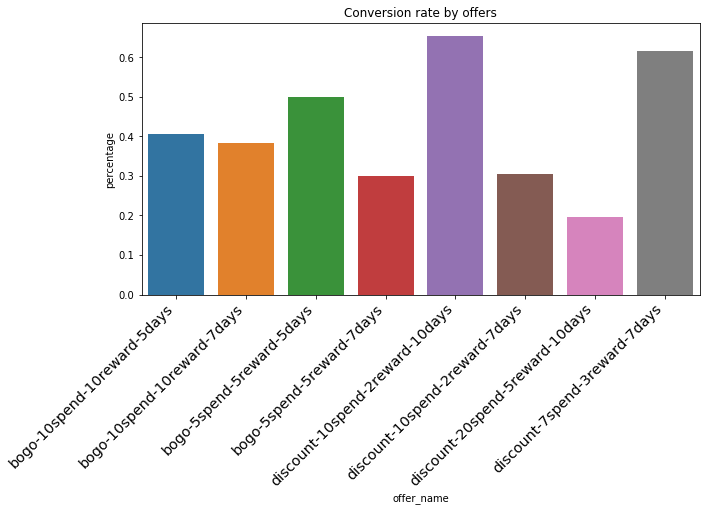

In [35]:
plt.figure(figsize=(10, 5))
offer_chart = sns.barplot(data=best_offers_cr.iloc[:-2, :], x='offer_name', y='percentage')
offer_chart.set_xticklabels(
    offer_chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
offer_chart.set_title('Conversion rate by offers')
plt.show()

In [36]:
best_offers_mean = offers.groupby(['offer_name'])['amount'].mean()
best_offers_mean = pd.DataFrame(best_offers_mean).unstack(level=0).reset_index().rename({0: 'avg_spend'}, axis=1)
best_offers_mean = pd.DataFrame(best_offers_mean)

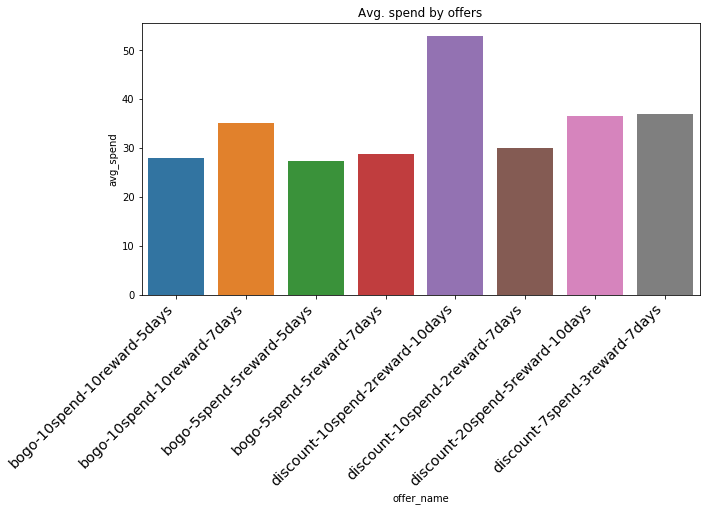

In [37]:
plt.figure(figsize=(10, 5))
offer_chart = sns.barplot(data=best_offers_mean.iloc[:-2, :], x='offer_name', y='avg_spend')
offer_chart.set_xticklabels(
    offer_chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
offer_chart.set_title('Avg. spend by offers')
plt.show()

Text(0, 0.5, 'amount in $')

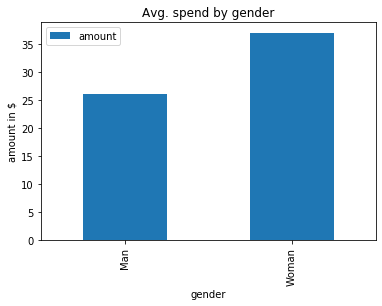

In [38]:
spend_gender = pd.DataFrame(offers.groupby(['gender'])['amount'].mean()).rename({0: 'Man', 1: 'Woman'})
spend_gender.plot(kind='bar', title='Avg. spend by gender').set_ylabel('amount in $')

Text(0, 0.5, 'percentage')

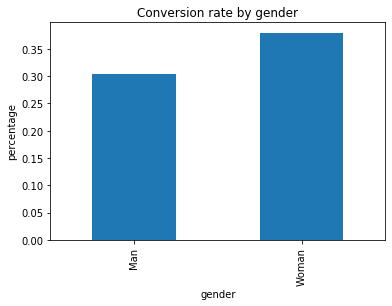

In [39]:
conversion_by_gender = pd.DataFrame(offers.groupby(['gender', 'offer_success']).count())
conversion_by_gender = conversion_by_gender.unstack(level=0).loc[:, 'customer_id'].rename({0: 'Man', 1: 'Woman'}, axis=1)
conversion_by_gender = conversion_by_gender.apply(lambda x: x[1] / x.sum(), axis=0)
conversion_by_gender.plot(kind='bar', title='Conversion rate by gender').set_ylabel('percentage')

Text(0, 0.5, 'percentage')

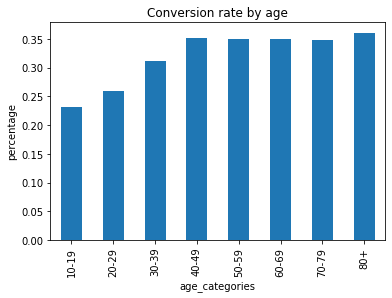

In [40]:
conversion_by_age = pd.DataFrame(offers.groupby(['age_categories', 'offer_success']).count())
conversion_by_age = conversion_by_age.unstack(level=0).loc[:, 'customer_id']
conversion_by_age = conversion_by_age.apply(lambda x: x[1] / x.sum(), axis=0)
conversion_by_age.plot(kind='bar', title='Conversion rate by age').set_ylabel('percentage')

Text(0, 0.5, 'amount in $')

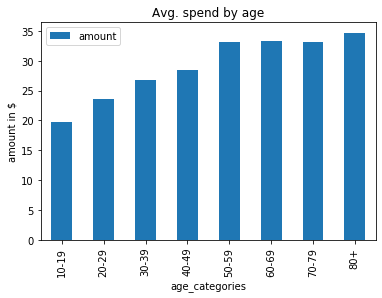

In [41]:
avg_spend_age = pd.DataFrame(offers.groupby(['age_categories'])['amount'].mean())
avg_spend_age.plot(kind='bar', title='Avg. spend by age').set_ylabel('amount in $')

Text(0, 0.5, 'percentage')

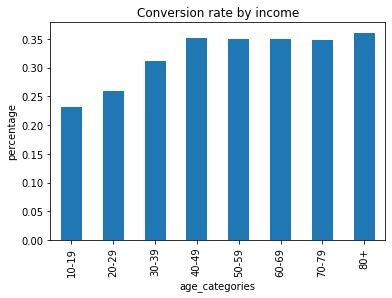

In [42]:
conversion_by_income = pd.DataFrame(offers.groupby(['income_binned', 'offer_success']).count())
conversion_by_income = conversion_by_income.unstack(level=0).loc[:, 'customer_id']
conversion_by_income = conversion_by_income.apply(lambda x: x[1] / x.sum(), axis=0).sort_index()
conversion_by_age.plot(kind='bar', title='Conversion rate by income').set_ylabel('percentage')

In [43]:
def offer_type_cr(df, col):
    df = offers.groupby([col, 'offer_type'])['offer_success'].agg(['sum', 'count'])
    idx = pd.IndexSlice
    df['conversion_rate'] = df['sum'].div(df['count'], level=1).round(2)
    return df

Text(0, 0.5, 'conversion rate in %')

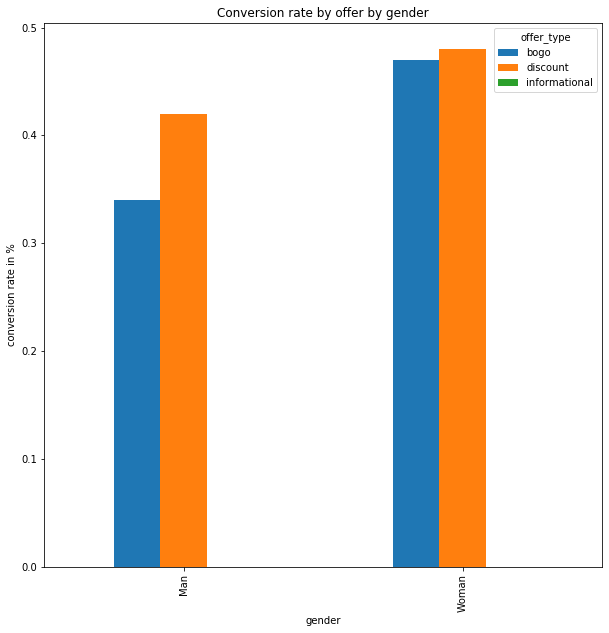

In [44]:
offer_type_cr(offers, 'gender')['conversion_rate'].rename({0: 'Man', 1: 'Woman'}).unstack().plot(kind='bar', figsize=(10, 10), title='Conversion rate by offer by gender').set_ylabel('conversion rate in %')

Text(0, 0.5, 'conversion rate in %')

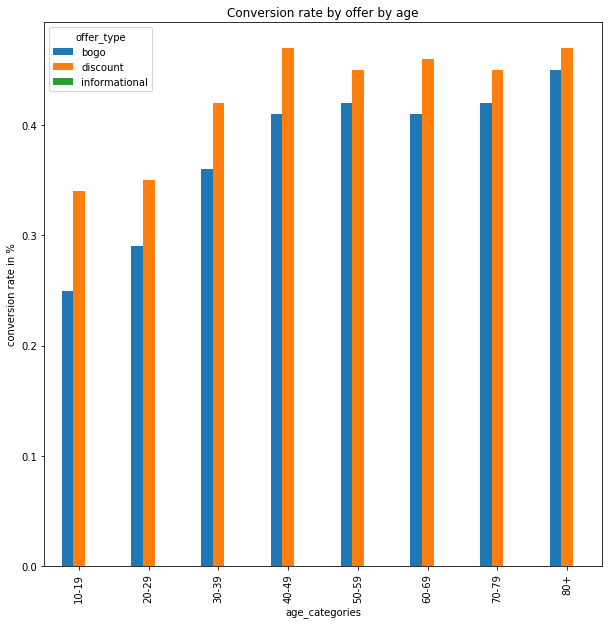

In [45]:
offer_type_cr(offers, 'age_categories')['conversion_rate'].unstack().plot(kind='bar', figsize=(10, 10), title='Conversion rate by offer by age').set_ylabel('conversion rate in %')

Text(0, 0.5, 'conversion rate in %')

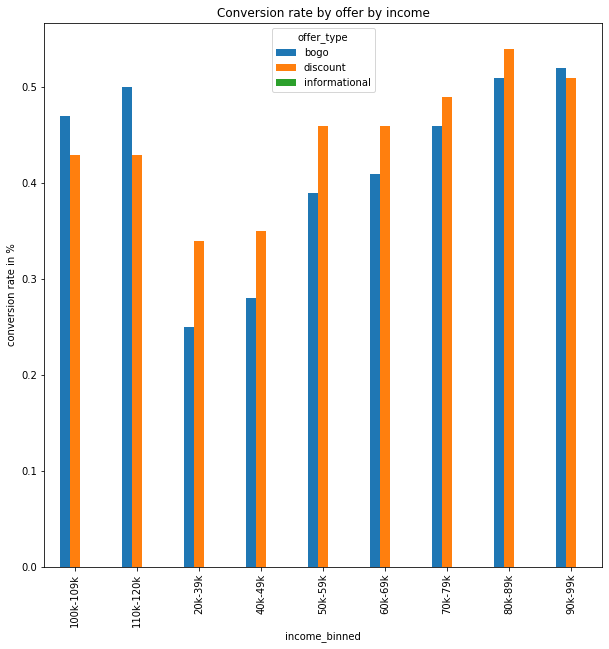

In [46]:
offer_type_cr(offers, 'income_binned')['conversion_rate'].unstack().plot(kind='bar', figsize=(10, 10), title='Conversion rate by offer by income').set_ylabel('conversion rate in %')

In [47]:
offers.columns

Index(['customer_id', 'time', 'planned_reward', 'required_spend', 'duration',
       'offer_type', 'offer_id', 'channel_email', 'channel_mobile',
       'channel_social', 'channel_web', 'offer_name', 'event_offer_completed',
       'event_offer_received', 'event_offer_viewed', 'offer_ends',
       'completed_at', 'viewed_at', 'offer_success', 'offer_success_no_view',
       'amount', 'gender', 'age', 'became_member_on', 'income',
       'became_member_year', 'became_member_month', 'membership_duration',
       'age_categories', 'income_binned'],
      dtype='object')

Text(0, 0.5, 'conversion rate in %')

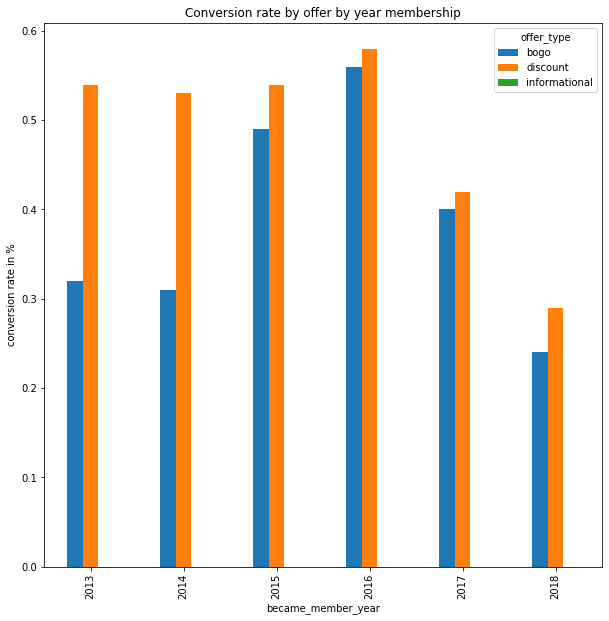

In [48]:
# probably no significance, not enough data to make a conclusion that older customers react better to discounts
offer_type_cr(offers, 'became_member_year')['conversion_rate'].unstack().plot(kind='bar', figsize=(10, 10), title='Conversion rate by offer by year membership').set_ylabel('conversion rate in %')

In [49]:
offers['became_member_year'].value_counts()

2017    24746
2018    16254
2016    13386
2015     7025
2014     2960
2013     1214
Name: became_member_year, dtype: int64

In [50]:
offers.columns

Index(['customer_id', 'time', 'planned_reward', 'required_spend', 'duration',
       'offer_type', 'offer_id', 'channel_email', 'channel_mobile',
       'channel_social', 'channel_web', 'offer_name', 'event_offer_completed',
       'event_offer_received', 'event_offer_viewed', 'offer_ends',
       'completed_at', 'viewed_at', 'offer_success', 'offer_success_no_view',
       'amount', 'gender', 'age', 'became_member_on', 'income',
       'became_member_year', 'became_member_month', 'membership_duration',
       'age_categories', 'income_binned'],
      dtype='object')

Text(0, 0.5, 'number of offers sent')

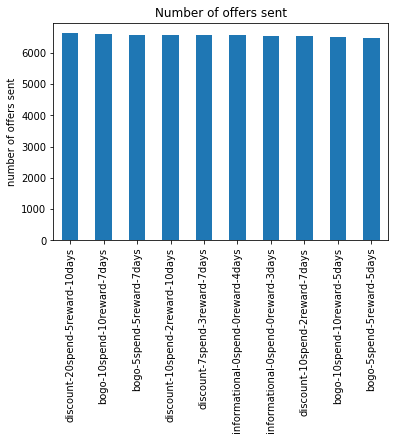

In [51]:
offers['offer_name'].value_counts().plot(kind='bar', title='Number of offers sent').set_ylabel('number of offers sent')

In [52]:

offers.groupby('gender')['offer_success'].agg(['sum', 'count'])

,sum,count
gender,,
0.0,11590,38129
1.0,10426,27456


In [53]:
def cr_no_view(df, metric, *cols):
    df = offers.groupby([*cols])[metric].agg(['sum', 'count'])
    idx = pd.IndexSlice
    df['conversion_rate'] = df['sum'].div(df['count'], level=1).round(2)
    return df

In [54]:
def rename_fields(df):
    return df.rename({0: 'Man', 1: 'Woman'}).rename({'sum': 'success offers w/o view', 'count': 'total offers sent'}, axis=1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12df6c910>,
      dtype=object)

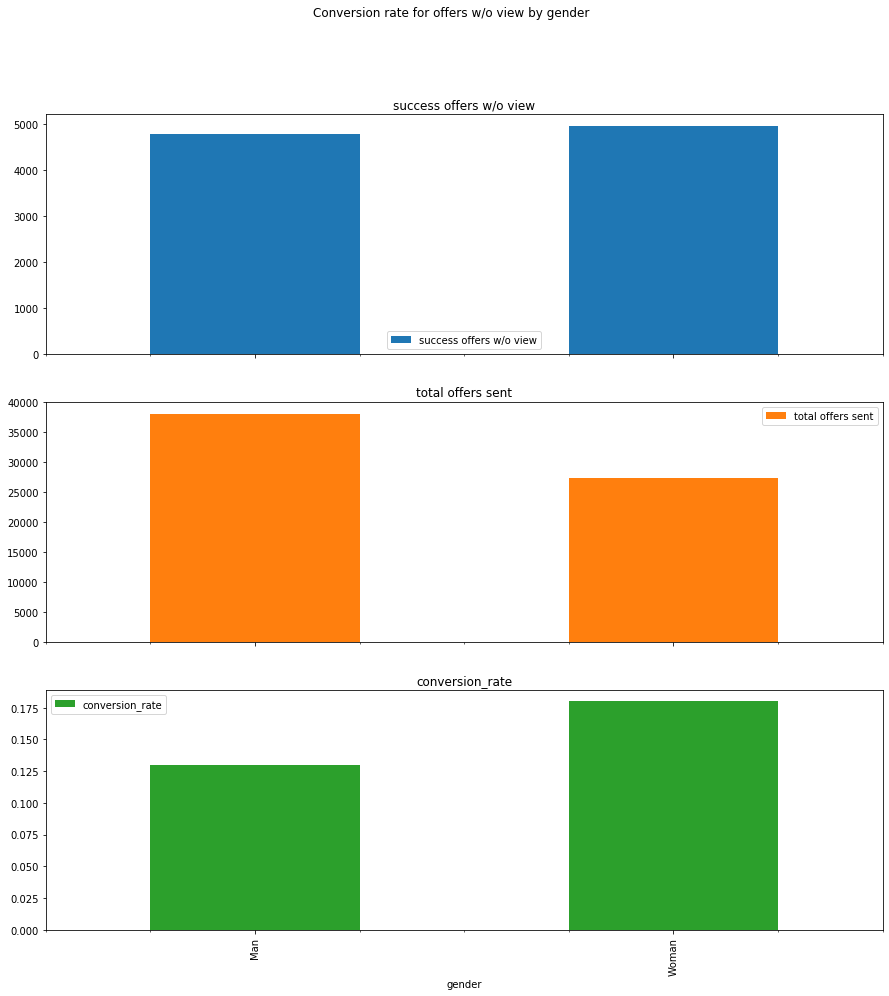

In [55]:
rename_fields(cr_no_view(offers, 'offer_success_no_view', 'gender'))\
    .plot(kind='bar', subplots=True, figsize=(15, 15), title='Conversion rate for offers w/o view by gender')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12df48850>,
      dtype=object)

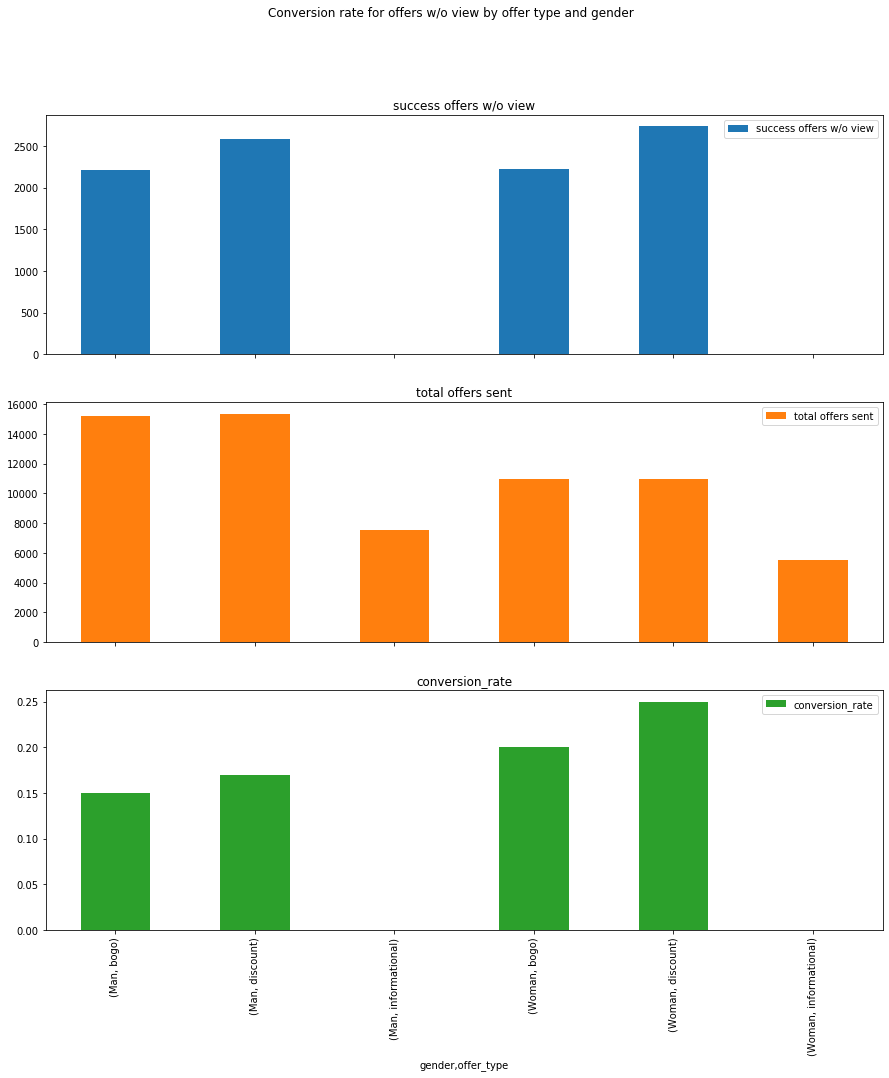

In [56]:
rename_fields(cr_no_view(offers, 'offer_success_no_view', 'gender', 'offer_type'))\
    .plot(kind='bar', subplots=True, figsize=(15, 15), title='Conversion rate for offers w/o view by offer type and gender')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12fb0ead0>,
      dtype=object)

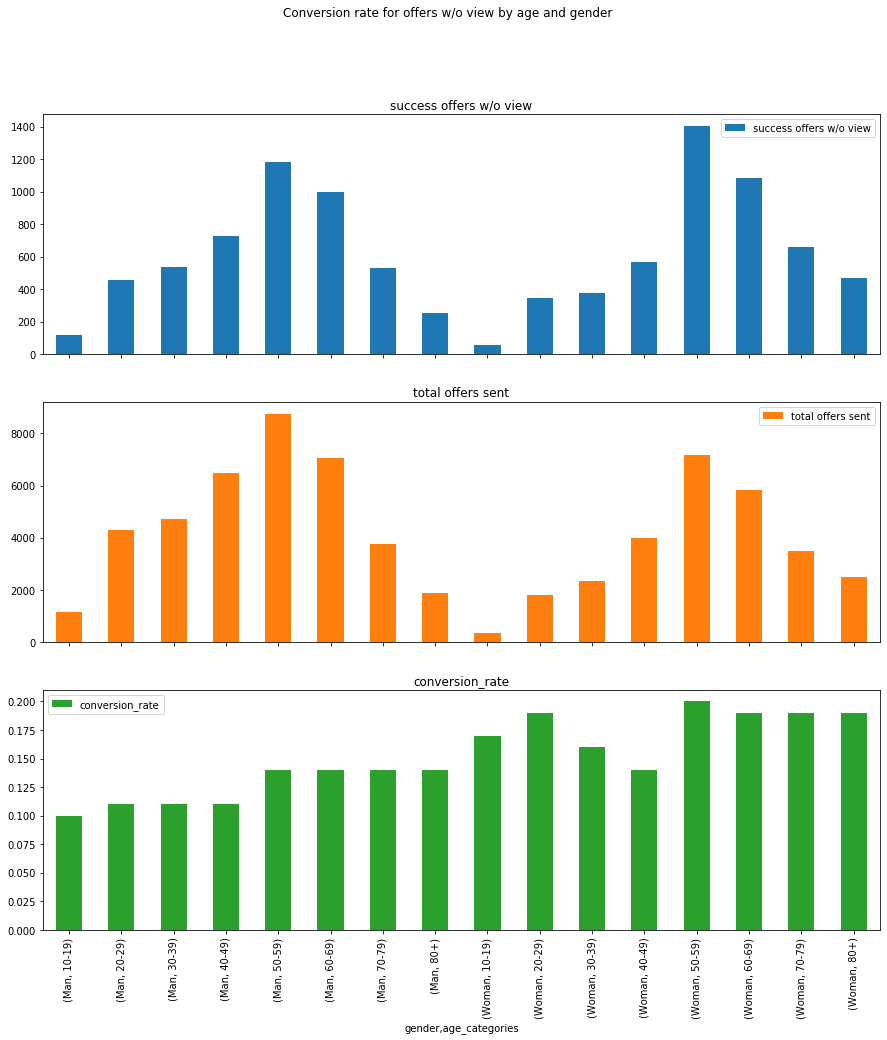

In [57]:
rename_fields(cr_no_view(offers, 'offer_success_no_view', 'gender', 'age_categories'))\
        .plot(kind='bar', subplots=True, figsize=(15, 15), title='Conversion rate for offers w/o view by age and gender')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12ed07e10>,
      dtype=object)

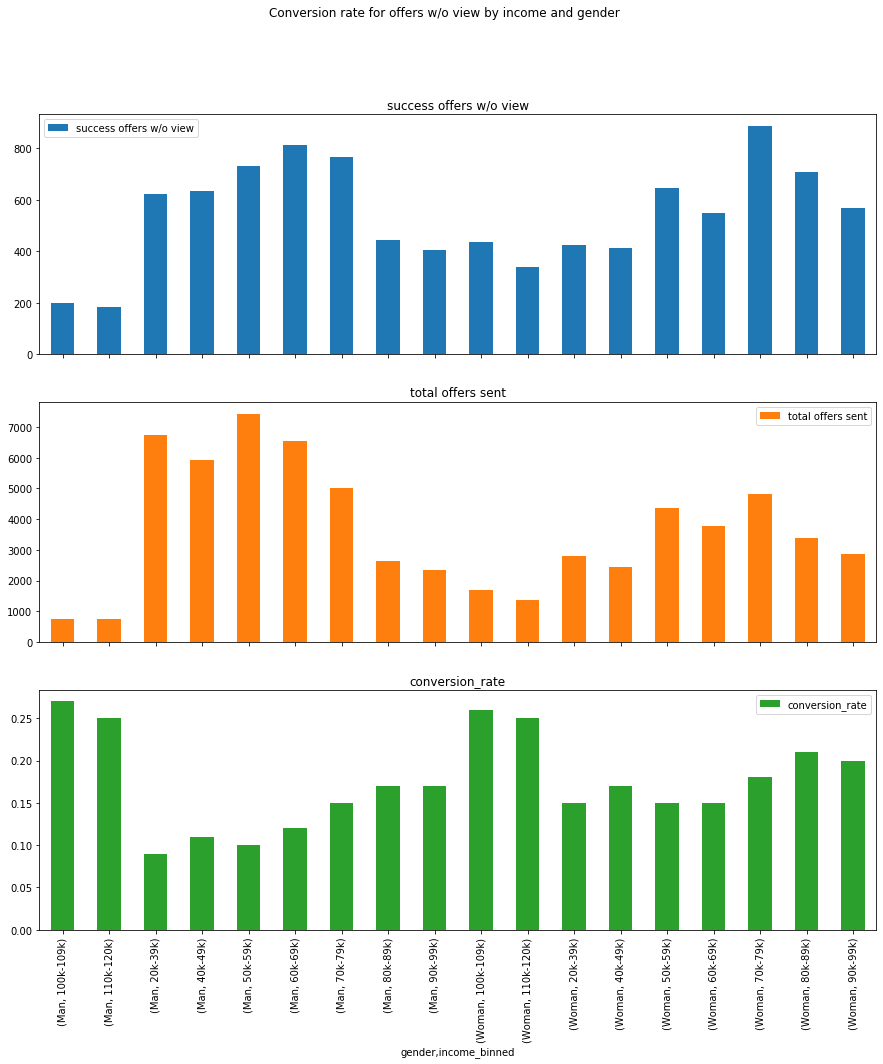

In [58]:
rename_fields(cr_no_view(offers, 'offer_success_no_view', 'gender', 'income_binned'))\
    .plot(kind='bar', subplots=True, figsize=(15, 15), title='Conversion rate for offers w/o view by income and gender')

# Prediction

In [59]:
offers.dtypes
offers['offer_type'].unique()

array(['bogo', 'informational', 'discount'], dtype=object)

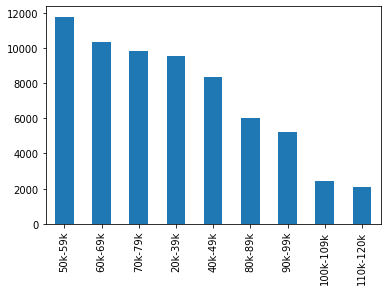

In [60]:
offers['income_binned'].value_counts().plot(kind='bar')

In [61]:
def prepare_data(df):
    df['gender'] = df['gender'].map({0: 'Man', 1: 'Woman'})
    df = df.drop(columns=['customer_id', 
                          'time', 
                          'offer_id', 
                          'offer_name', 
                          'event_offer_completed', 
                          'event_offer_received', 
                          'event_offer_viewed',
                          'offer_ends',
                          'completed_at',
                          'viewed_at',
                          'became_member_on',
                          'became_member_month',
                          'membership_duration',
                          'offer_success_no_view',
                          'income_binned',
                          #'amount' # should be dropped, since it's a posterior value
                         ], axis=1)
    df = pd.get_dummies(data=df, columns=['gender', 'offer_type', 'age_categories'])
    return df

In [62]:
data = prepare_data(offers.copy())

In [63]:
data.columns

Index(['planned_reward', 'required_spend', 'duration', 'channel_email',
       'channel_mobile', 'channel_social', 'channel_web', 'offer_success',
       'amount', 'age', 'income', 'became_member_year', 'gender_Man',
       'gender_Woman', 'offer_type_bogo', 'offer_type_discount',
       'offer_type_informational', 'age_categories_10-19',
       'age_categories_20-29', 'age_categories_30-39', 'age_categories_40-49',
       'age_categories_50-59', 'age_categories_60-69', 'age_categories_70-79',
       'age_categories_80+'],
      dtype='object')

In [64]:
X = data.drop('offer_success', axis=1)
y = data['offer_success']

Text(0, 0.5, 'amount')

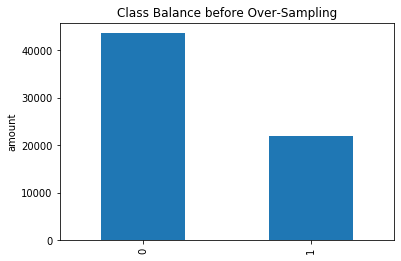

In [65]:
y.value_counts().plot(kind='bar', title='Class Balance before Over-Sampling').set_ylabel('amount')

In [66]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


Text(0, 0.5, 'amount')

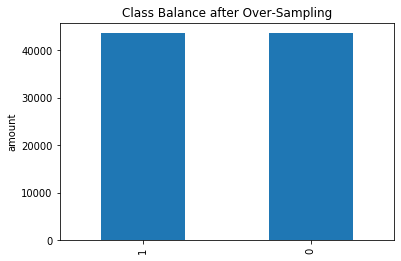

In [67]:
y_resampled.value_counts().plot(kind='bar', title='Class Balance after Over-Sampling').set_ylabel('amount')

In [68]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
X.describe()

,planned_reward,required_spend,duration,channel_email,channel_mobile,channel_social,channel_web,amount,age,income,became_member_year,gender_Man,gender_Woman,offer_type_bogo,offer_type_discount,offer_type_informational,age_categories_10-19,age_categories_20-29,age_categories_30-39,age_categories_40-49,age_categories_50-59,age_categories_60-69,age_categories_70-79,age_categories_80+
count,65585.000000,65585.000000,65585.000000,65585.0,65585.000000,65585.000000,65585.000000,65585.000000,65585.000000,65585.000000,65585.000000,65585.000000,65585.000000,65585.000000,65585.000000,65585.000000,65585.000000,65585.000000,65585.000000,65585.000000,65585.000000,65585.000000,65585.000000,65585.000000
mean,4.200778,7.715499,6.507448,1.0,0.898956,0.598765,0.799741,30.621165,54.364245,65402.470077,2016.620066,0.581368,0.418632,0.399222,0.400961,0.199817,0.022764,0.093329,0.108119,0.159655,0.242555,0.196844,0.110223,0.066509
std,3.399038,5.545371,2.204051,0.0,0.301390,0.490152,0.400197,57.855073,17.412684,21655.610947,1.199338,0.493339,0.493339,0.489742,0.490097,0.399866,0.149153,0.290896,0.310533,0.366289,0.428632,0.397616,0.313170,0.249172
min,0.000000,0.000000,3.000000,1.0,0.000000,0.000000,0.000000,0.000000,18.000000,30000.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,5.000000,5.000000,1.0,1.000000,0.000000,1.000000,2.260000,42.000000,49000.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,10.000000,7.000000,1.0,1.000000,1.000000,1.000000,16.240000,55.000000,64000.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,10.000000,7.000000,1.0,1.000000,1.000000,1.000000,40.390000,66.000000,80000.000000,2017.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,20.000000,10.000000,1.0,1.000000,1.000000,1.000000,1200.990000,101.000000,120000.000000,2018.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
X = X_resampled
y = y_resampled

In [70]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
to_scale = ['planned_reward', 'required_spend', 'duration', 'age', 'income', 'became_member_year', 'amount']
X[to_scale] = scaler.fit_transform(X[to_scale])

In [71]:
X.describe()

,planned_reward,required_spend,duration,channel_email,channel_mobile,channel_social,channel_web,amount,age,income,became_member_year,gender_Man,gender_Woman,offer_type_bogo,offer_type_discount,offer_type_informational,age_categories_10-19,age_categories_20-29,age_categories_30-39,age_categories_40-49,age_categories_50-59,age_categories_60-69,age_categories_70-79,age_categories_80+
count,87138.000000,87138.000000,87138.000000,87138.0,87138.000000,87138.000000,87138.000000,87138.000000,87138.000000,87138.000000,87138.000000,87138.000000,87138.000000,87138.000000,87138.000000,87138.000000,87138.00000,87138.000000,87138.000000,87138.000000,87138.000000,87138.000000,87138.000000,87138.000000
mean,0.438733,0.399979,0.526265,1.0,0.909397,0.639423,0.821065,0.030614,0.442104,0.403720,0.713168,0.567364,0.432636,0.417281,0.432326,0.150394,0.02099,0.088193,0.106372,0.161043,0.244979,0.199419,0.111157,0.067846
std,0.332881,0.256856,0.305567,0.0,0.287046,0.480171,0.383300,0.052914,0.207864,0.239731,0.237989,0.495444,0.495444,0.493113,0.495402,0.357459,0.14335,0.283578,0.308314,0.367573,0.430077,0.399566,0.314328,0.251484
min,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.250000,0.285714,1.0,1.000000,0.000000,1.000000,0.004963,0.301205,0.222222,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.571429,1.0,1.000000,1.000000,1.000000,0.018343,0.457831,0.388889,0.800000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.500000,0.571429,1.0,1.000000,1.000000,1.000000,0.040233,0.590361,0.566667,0.800000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7, shuffle=True)

In [73]:
class Naive_CLF:
    def __init__(self):
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, x):
        x = x.copy()
        x = x.to_numpy()[:, 0]
        x[:] = 1
        return x

In [74]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, make_scorer

clf = Naive_CLF()
y_preds = clf.predict(X_test)


print('Accuracy score: ', accuracy_score(y_preds, y_test))
print('f1 score: ', f1_score(y_preds, y_test))
print('Precision score: ', precision_score(y_preds, y_test))
print('Recall score: ', recall_score(y_preds, y_test))


Accuracy score:  0.5007459260959376
f1 score:  0.6673293825272415
Precision score:  1.0
Recall score:  0.5007459260959376


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.792541 (0.003924)


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LDA: 0.750165 (0.003250)


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.780118 (0.004614)


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.883331 (0.004629)


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NB: 0.652589 (0.002273)


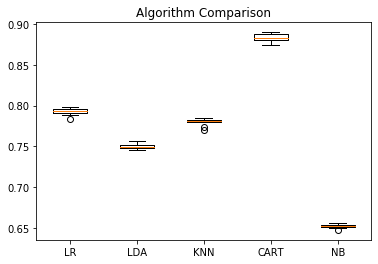

In [75]:
# https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
# compare algorithms
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [76]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

def evaluate(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    print(f'Accuracy: {round(accuracy_score(y_test, y_pred) * 100, 2)}%')
    print(f'F1 Score: {round(f1_score(y_test, y_pred) * 100, 2)}%')
    print(f'Recall Score: {round(precision_score(y_test, y_pred) * 100, 2)}%')
    print(f'Precision Score: {round(recall_score(y_test, y_pred) * 100, 2)}%')

def plot_cfm(clf, X_test, y_test):
    plot_confusion_matrix(clf, X_test, y_test, normalize='true')

In [77]:
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth=7, n_estimators=600, learning_rate=0.02, objective='binary:logistic', random_state=7)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.02, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=600, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=7, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

Accuracy: 87.82%
F1 Score: 88.78%
Recall Score: 82.4%
Precision Score: 96.22%


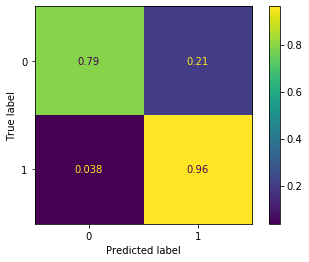

In [78]:
plot_cfm(xgb, X_test, y_test)
evaluate(xgb, X_test, y_test)

In [79]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

ada = AdaBoostClassifier(RandomForestClassifier(max_depth=10, n_estimators=250), n_estimators=10, random_state=7)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

Accuracy: 88.88%
F1 Score: 89.69%
Recall Score: 83.73%
Precision Score: 96.55%


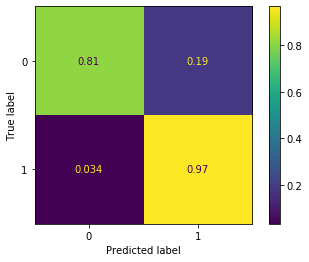

In [80]:
plot_cfm(ada, X_test, y_test)
evaluate(ada, X_test, y_test)

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Accuracy: 86.28%
F1 Score: 87.33%
Recall Score: 81.22%
Precision Score: 94.43%


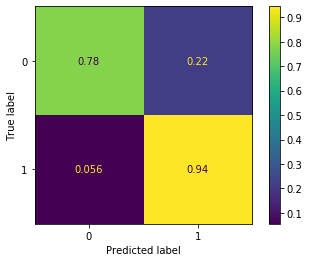

In [82]:
plot_cfm(gbc, X_test, y_test)
evaluate(gbc, X_test, y_test)

In [83]:
rdf = RandomForestClassifier()
rdf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy: 90.1%
F1 Score: 90.67%
Recall Score: 85.89%
Precision Score: 96.0%


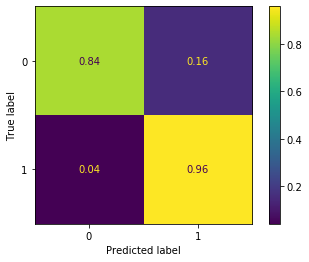

In [84]:
plot_cfm(rdf, X_test, y_test)
evaluate(rdf, X_test, y_test)

In [85]:
# https://github.com/udacity/machine-learning/blob/master/projects/finding_donors/visuals.py

def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Create the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(7), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()

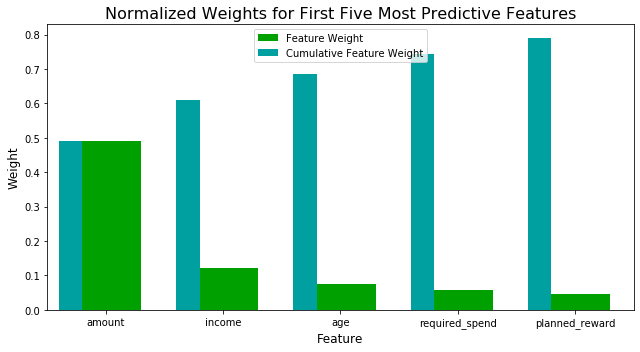

In [86]:
feature_plot(rdf.feature_importances_, X_train, y_train)

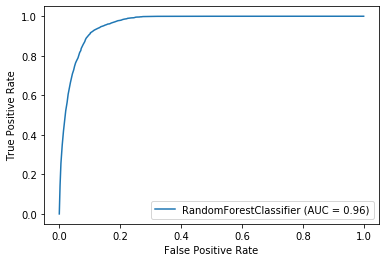

In [87]:
from sklearn.metrics import plot_roc_curve

rdf_disp = plot_roc_curve(rdf, X_test, y_test)
plt.show()

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

param_grid = { 
    'n_estimators': [10, 20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
}

scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(estimator=rdf, param_grid=param_grid, cv=5, verbose=10, scoring=scorer)
grid_fit = grid_obj.fit(X_train, y_train)
best_clf = grid_fit.best_estimator_
best_clf

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=10, n_estimators=10 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... max_depth=10, n_estimators=10, score=0.873, total=   0.3s
[CV] max_depth=10, n_estimators=10 ...................................
[CV] ....... max_depth=10, n_estimators=10, score=0.879, total=   0.2s
[CV] max_depth=10, n_estimators=10 ...................................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s



[CV] ....... max_depth=10, n_estimators=10, score=0.878, total=   0.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s


[CV] max_depth=10, n_estimators=10 ...................................
[CV] ....... max_depth=10, n_estimators=10, score=0.879, total=   0.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s remaining:    0.0s


[CV] max_depth=10, n_estimators=10 ...................................
[CV] ....... max_depth=10, n_estimators=10, score=0.875, total=   0.2s
[CV] max_depth=10, n_estimators=20 ...................................
[CV] ....... max_depth=10, n_estimators=20, score=0.874, total=   0.5s
[CV] max_depth=10, n_estimators=20 ...................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.7s remaining:    0.0s


[CV] ....... max_depth=10, n_estimators=20, score=0.880, total=   0.5s
[CV] max_depth=10, n_estimators=20 ...................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.2s remaining:    0.0s


[CV] ....... max_depth=10, n_estimators=20, score=0.877, total=   0.4s
[CV] max_depth=10, n_estimators=20 ...................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.6s remaining:    0.0s


[CV] ....... max_depth=10, n_estimators=20, score=0.878, total=   0.4s
[CV] max_depth=10, n_estimators=20 ...................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.0s remaining:    0.0s


[CV] ....... max_depth=10, n_estimators=20, score=0.874, total=   0.5s
[CV] max_depth=10, n_estimators=50 ...................................
[CV] ....... max_depth=10, n_estimators=50, score=0.875, total=   1.1s
[CV] max_depth=10, n_estimators=50 ...................................
[CV] ....... max_depth=10, n_estimators=50, score=0.881, total=   1.1s
[CV] max_depth=10, n_estimators=50 ...................................
[CV] ....... max_depth=10, n_estimators=50, score=0.879, total=   1.1s
[CV] max_depth=10, n_estimators=50 ...................................
[CV] ....... max_depth=10, n_estimators=50, score=0.879, total=   1.1s
[CV] max_depth=10, n_estimators=50 ...................................
[CV] ....... max_depth=10, n_estimators=50, score=0.876, total=   1.1s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.875, total=   2.2s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] .

[CV] ....... max_depth=25, n_estimators=20, score=0.897, total=   0.9s
[CV] max_depth=25, n_estimators=20 ...................................
[CV] ....... max_depth=25, n_estimators=20, score=0.897, total=   0.9s
[CV] max_depth=25, n_estimators=20 ...................................
[CV] ....... max_depth=25, n_estimators=20, score=0.893, total=   0.9s
[CV] max_depth=25, n_estimators=50 ...................................
[CV] ....... max_depth=25, n_estimators=50, score=0.895, total=   2.2s
[CV] max_depth=25, n_estimators=50 ...................................
[CV] ....... max_depth=25, n_estimators=50, score=0.896, total=   2.2s
[CV] max_depth=25, n_estimators=50 ...................................
[CV] ....... max_depth=25, n_estimators=50, score=0.897, total=   2.2s
[CV] max_depth=25, n_estimators=50 ...................................
[CV] ....... max_depth=25, n_estimators=50, score=0.895, total=   2.1s
[CV] max_depth=25, n_estimators=50 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.0min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy: 89.88%
F1 Score: 90.57%
Recall Score: 84.92%
Precision Score: 97.02%


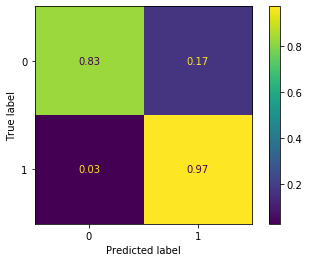

In [95]:
evaluate(best_clf, X_test, y_test)
plot_cfm(best_clf, X_test, y_test)